In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

Formatting and Cleaning

In [2]:
#cleaning
demo = pd.read_csv('base_dfs/df_final_demo.csv')
demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
# visualize nulls 
demo.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [4]:
# Rows with null values
demo.loc[demo["clnt_age"].isna()]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# find the client_id that are missing all values
nullRows = demo.loc[demo['bal'].isna()]['client_id'].values

In [6]:
# drop row with null values
demo.dropna(thresh=7, inplace=True)

In [7]:
# cleaning column names and fill null value in age, replace X to U (unknown)
demo.rename(columns={'gendr': 'gender'}, inplace=True)
demo.rename(columns= {'clnt_tenure_yr':'tenure_years'}, inplace = True)
demo.rename(columns= {'clnt_tenure_mnth':'tenure_month'}, inplace = True)
demo.rename(columns= {'clnt_age':'age'}, inplace = True)
demo.rename(columns= {'gendr':'gender'}, inplace = True)
demo.rename(columns= {'calls_6_mnth':'calls'}, inplace = True)
demo.rename(columns= {'logons_6_mnth':'logons'}, inplace = True)
demo['age'].fillna(round(demo['age'].mean()), inplace=True)
demo['gender'].replace({'X': 'U'}, inplace=True)

In [8]:
#cleaning group_type
group_type = pd.read_csv('base_dfs/df_final_experiment_clients.csv')
group_type

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
# amount of NaN
group_type.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [10]:
# function to find the index of the client ids that was null in demo
def indexfinder(values, df):
    indexer = []

    for value in values:
        i = df.loc[df['client_id'] == value].index
        indexer.append(i)

    return [x[0] for x in indexer]

list(nullRows)

[7402828,
 355337,
 8412164,
 2222915,
 4876926,
 5277910,
 7616759,
 8191345,
 1227228,
 8611797,
 5144725,
 1037867,
 1618749,
 6021001]

In [11]:
# changing name of the column, fill all NaN and droping the client ids with null values of the demo
group_type.rename(columns={'Variation': 'group_type'}, inplace=True)
group_type.drop(indexfinder(nullRows, group_type), inplace=True)
group_type.fillna('Unknow', inplace=True)

In [12]:
group_type["client_id"].value_counts().sum()

70595

In [13]:
#cleaning data 1
data1 = pd.read_csv('base_dfs\df_final_web_data_pt_1.csv')
data1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [14]:
#cleaning data 2
data2 = pd.read_csv('base_dfs\df_final_web_data_pt_2.csv')
data2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [15]:
# CONCATENATING THE 2 PARTS OF THE "DIGITAL FOOTPRINTS"
webdata = pd.concat([data1, data2], axis=0).reset_index(drop=True)
webdata.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [16]:
webdata.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [17]:
# drop duplicates and the client ids with null values on demo
webdata.drop_duplicates(inplace=True)
webdata.drop(indexfinder(nullRows, webdata), inplace=True)

In [18]:
# formatting date time
webdata['date_time'] = pd.to_datetime(webdata['date_time'])

In [19]:
# filtering to client ids on demo
unique_client_id= demo["client_id"].to_list()
webdata2 = webdata.loc[webdata["client_id"].isin(unique_client_id)]
webdata2
webdata2['client_id'].nunique()

70595

In [20]:
# webdata2

Import to SQL

In [21]:
import mysql.connector
from getpass import getpass
from sqlalchemy import create_engine

In [22]:
# get connected to the sql 

host= '127.0.0.1'
pw= getpass()
user= 'root'

conn = mysql.connector.connect(host= host, user= user, password= pw)

In [23]:
#now are creating a cursor, that will hold our query, execute it, and fetch results

cursor = conn.cursor()

In [24]:
# querying the database to sql

query = """CREATE DATABASE IF NOT EXISTS project;"""

cursor.execute(query)

query1 = "SHOW DATABASES"
cursor.execute(query1)
cursor.fetchall()

In [25]:
#sending to sql
eng3 = create_engine(f'mysql+pymysql://{user}:{pw}@{host}/project')
webdata.to_sql('webdata', con= eng3)

In [26]:
#sending to sql
eng2 = create_engine(f'mysql+pymysql://{user}:{pw}@{host}/project')
group_type.to_sql('group_type', con= eng2)

In [27]:
#sending to sql
eng = create_engine(f'mysql+pymysql://{user}:{pw}@{host}/project')
demo.to_sql('demo', con= eng)

DESCRIPTIVE STATS

In [28]:
# Average "tenure_years", "age", "number of accounts" and "balance"
mean_years = demo['tenure_years'].mean().round(2)
mean_age = demo['age'].mean().round(2)
mean_accounts = demo['num_accts'].mean().round(2)
mean_balance = demo['bal'].mean().round(2)

mean_years, mean_age, mean_accounts, mean_balance

(12.05, 46.44, 2.26, 147445.24)

c:\Users\ruijr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

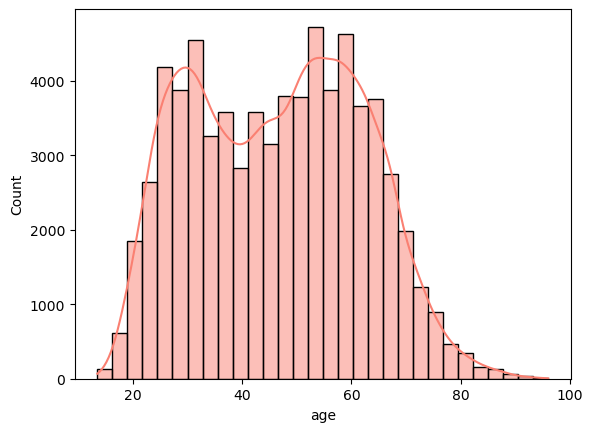

In [29]:
sns.histplot(demo['age'], kde=True, bins=30, color="salmon")

In [30]:
# Ratio of genders
proportion_gender = demo['gender'].value_counts(normalize=True)
proportion_gender

gender
U    0.341738
M    0.336058
F    0.322204
Name: proportion, dtype: float64

In [31]:
# Average of "Tenure years" by "age"
demo.groupby(["age"]).agg({"tenure_years":["mean"]}).sort_values(by=('tenure_years','mean'), ascending = False).round(2).reset_index()

,age,tenure_years
,,mean
0,91.5,23.33
1,89.5,22.00
2,83.0,20.40
3,77.5,19.07
4,85.0,19.06
...,...,...
160,15.5,8.22
161,23.0,8.10
162,22.5,7.95


In [32]:
# Average of "Tenure years" by "gender"
demo.groupby(["gender"]).agg({"tenure_years":["mean"]}).sort_values(by=('tenure_years','mean'), ascending = False).round(2).reset_index()

,gender,tenure_years
,,mean
0,M,14.88
1,F,14.79
2,U,6.69


In [33]:
# Average of "balance" by "age"
demo.groupby(["age"]).agg({"bal":["mean"]}).sort_values(by=('bal','mean'), ascending = False).round(2).reset_index()

,age,bal
,,mean
0,93.5,785354.28
1,81.5,409541.08
2,94.0,394455.75
3,93.0,364874.42
4,75.5,357623.29
...,...,...
160,16.0,31323.22
161,15.0,30530.48
162,14.5,25033.19


In [34]:
# Average of "balance" by "gender"
demo.groupby(["gender"]).agg({"bal":["mean"]}).sort_values(by=('bal','mean'), ascending = False).round(2).reset_index()

,gender,bal
,,mean
0,M,212299.87
1,F,135561.33
2,U,94873.23


In [35]:
# Average of "num_accounts" by "age"
demo.groupby(["age"]).agg({"num_accts":["mean"]}).sort_values(by=('num_accts','mean'), ascending = False).round(2).reset_index()

,age,num_accts
,,mean
0,82.5,2.50
1,78.5,2.42
2,81.5,2.41
3,80.5,2.40
4,74.5,2.36
...,...,...
160,92.5,2.00
161,90.0,2.00
162,89.5,2.00


In [36]:
# Average of "num_accounts" by "gender"
demo.groupby(["gender"]).agg({"num_accts":["mean"]}).sort_values(by=('num_accts','mean'), ascending = False).round(2).reset_index()

,gender,num_accts
,,mean
0,M,2.33
1,F,2.23
2,U,2.21


In [37]:
# Ratio of "group type"
proportion_type = group_type['group_type'].value_counts(normalize=True)
proportion_type

group_type
Test       0.381911
Control    0.333267
Unknow     0.284822
Name: proportion, dtype: float64

In [38]:
# this was also used to import in Tableau
merged = pd.merge(demo, group_type, on='client_id')
merged.head()

,client_id,tenure_years,tenure_month,age,gender,num_accts,bal,calls,logons,group_type
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [39]:
# merged.to_excel('merged.xlsx')

In [40]:
#Average of tenure years, age, number of accounts and balance for the test group
mean_tenure_test = merged[merged['group_type'] == 'Test']['tenure_years'].mean().round(2)
mean_age_test = merged[merged['group_type']=='Test']['age'].mean().round(2)
mean_accounts_test = merged[merged['group_type']=='Test']['num_accts'].mean().round(2)
mean_balance_test = merged[merged['group_type']=='Test']['bal'].mean().round(2)

mean_tenure_test, mean_age_test, mean_accounts_test, mean_balance_test

(11.98, 47.16, 2.25, 148962.61)

In [41]:
#Average of tenure years, age, number of accounts and balance for the control group
mean_tenure_control = merged[merged['group_type'] == 'Control']['tenure_years'].mean().round(2)
mean_age_control = merged[merged['group_type']=='Control']['age'].mean().round(2)
mean_accounts_control = merged[merged['group_type']=='Control']['num_accts'].mean().round(2)
mean_balance_control = merged[merged['group_type']=='Control']['bal'].mean().round(2)

mean_tenure_control, mean_age_control, mean_accounts_control, mean_balance_control

(12.09, 47.5, 2.26, 150147.33)

In [42]:
#Ratio of genders in the test group
proportion_gender_test = merged[merged['group_type']=='Test']['gender'].value_counts(normalize=True)
proportion_gender_test

gender
U    0.343756
M    0.332962
F    0.323282
Name: proportion, dtype: float64

In [43]:
#Ratio of genders in the control group
proportion_gender_control = merged[merged['group_type']=='Control']['gender'].value_counts(normalize=True)
proportion_gender_control

gender
U    0.34063
M    0.33876
F    0.32061
Name: proportion, dtype: float64

In [44]:
#Average of tenure years by age of the test group
test_group = merged[merged['group_type'] == 'Test']
test_group.groupby('age')['tenure_years'].mean().reset_index().sort_values(by='tenure_years', ascending=False).round(2)

,age,tenure_years
150,92.0,26.50
149,91.5,25.67
156,96.0,24.00
145,89.5,24.00
132,83.0,22.42
...,...,...
1,17.5,7.70
13,23.5,7.67
138,86.0,7.50
6,20.0,7.49


In [45]:
#Average of tenure years by age of the control group
control_group = merged[merged['group_type'] == 'Control']
control_group.groupby('age')['tenure_years'].mean().reset_index().sort_values(by='tenure_years', ascending=False).round(2)

,age,tenure_years
150,92.5,30.00
148,91.5,25.00
141,87.5,24.00
146,90.5,22.00
134,84.0,22.00
...,...,...
1,17.5,7.96
5,19.5,7.93
12,23.0,7.32
154,96.0,6.00


In [46]:
#Average balance by age of the test group
test_group.groupby('age')['bal'].mean().reset_index().sort_values(by='bal', ascending=False).round(2)

,age,bal
139,86.5,711772.29
152,93.0,702058.14
153,94.0,562602.24
135,84.5,452669.31
129,81.5,350821.84
...,...,...
4,19.0,39686.77
0,17.0,37980.98
1,17.5,37649.02
6,20.0,37036.72


In [47]:
#Average balance by age of the control group
control_group.groupby('age')['bal'].mean().reset_index().sort_values(by='bal', ascending=False).round(2)

,age,bal
152,93.5,785354.28
143,88.5,578358.26
129,81.5,513918.13
132,83.0,443797.96
115,74.5,405009.05
...,...,...
5,19.5,38102.94
1,17.5,37848.67
2,18.0,35984.17
4,19.0,35889.79


In [48]:
#Average of the number of accounts by age of the test group
test_group.groupby('age')['num_accts'].mean().reset_index().sort_values(by='num_accts', ascending=False).round(2)

,age,num_accts
131,82.5,2.64
135,84.5,2.55
123,78.5,2.50
115,74.5,2.48
127,80.5,2.44
...,...,...
146,90.0,2.00
145,89.5,2.00
143,88.5,2.00
138,86.0,2.00


In [49]:
#Average of the number of accounts by age of the control group
control_group.groupby('age')['num_accts'].mean().reset_index().sort_values(by='num_accts', ascending=False).round(2)

,age,num_accts
146,90.5,3.00
143,88.5,2.50
141,87.5,2.50
147,91.0,2.50
131,82.5,2.44
...,...,...
138,86.0,2.00
137,85.5,2.00
135,84.5,2.00
133,83.5,2.00


In [50]:
#Average of tenure years by gender of the test group
test_group.groupby('gender')['tenure_years'].mean().reset_index().sort_values(by='tenure_years', ascending=False).round(2)

,gender,tenure_years
1,M,14.80
0,F,14.74
2,U,6.67


In [51]:
#Average of tenure years by gender of the control group
control_group.groupby('gender')['tenure_years'].mean().reset_index().sort_values(by='tenure_years', ascending=False).round(2)

,gender,tenure_years
1,M,14.93
0,F,14.81
2,U,6.69


In [52]:
#Average balance by gender of the test group
test_group.groupby('gender')['bal'].mean().reset_index().sort_values(by='bal', ascending=False).round(2)

,gender,bal
1,M,209860.64
0,F,140732.03
2,U,97717.04


In [53]:
#Average balance by gender of the control group
control_group.groupby('gender')['bal'].mean().reset_index().sort_values(by='bal', ascending=False).round(2)

,gender,bal
1,M,216052.40
0,F,137162.66
2,U,96825.63


In [54]:
#Average of the number accounts of the test group by gender
test_group.groupby('gender')['num_accts'].mean().reset_index().sort_values(by='num_accts', ascending=False).round(2)

,gender,num_accts
1,M,2.32
0,F,2.23
2,U,2.21


In [55]:
#Average of the number accounts of the control group by gender
control_group.groupby('gender')['num_accts'].mean().reset_index().sort_values(by='num_accts', ascending=False).round(2)

,gender,num_accts
1,M,2.34
0,F,2.23
2,U,2.21


In [56]:
webdata_unique_client= webdata2.drop_duplicates(subset = ["visit_id","client_id"], keep = "first")
webdata_unique_client['client_id'].nunique()

70595

In [57]:
#merged dataframe to work on tableau
merged_1 = pd.merge(webdata_unique_client, group_type, on='client_id')
# merged_1['client_id'].nunique()
# merged_1.to_excel("merged_1.xlsx")

TABLEAU

In [ ]:
# The graphs of the profile of primary clients was done on Tableau.

FUNCTIONS

In [58]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest

In [59]:
# filter of diferent group types
gt_test=group_type[group_type["group_type"]=="Test"]
gt_control=group_type[group_type["group_type"]=="Control"]
gt_unknown=group_type[group_type["group_type"]=="Unknow"]

In [60]:
# function to count the number of successful visits
def count_successful(df_webdata,grouptype):
    
    #filter the df to the grouptype
    grouptype_id=grouptype["client_id"].to_list()
    df_webdata_filter=df_webdata.loc[df_webdata["client_id"].isin(grouptype_id)]

    #create a groupby iterable
    grouped=df_webdata_filter.groupby(["client_id","visit_id"])

    count=0
    timespent_dict = dict()
    count_client_visit = 0

    for name, group in grouped:  # iterating groupby object
        count_client_visit+=1
        # print(f"Group name {name}")
        # display(group)
        my_df=pd.DataFrame(group.groupby("process_step").agg({"date_time":"max"}))

        my_dict=my_df.to_dict()

        try:
            if my_dict["date_time"]["confirm"]>my_dict["date_time"]["step_3"]:
                if my_dict["date_time"]["step_3"]>my_dict["date_time"]["step_2"]:
                    if my_dict["date_time"]["step_2"]>my_dict["date_time"]["step_1"]:
                        if my_dict["date_time"]["step_1"]>my_dict["date_time"]["start"]:
                            count+=1
                            time_spent=my_dict["date_time"]["confirm"]-my_dict["date_time"]["start"]
                            timespent_dict[name]=time_spent
        
        except:
            pass
    return (len(grouptype_id), count_client_visit, count, timespent_dict,
print("index [0] - Number of client_id's:"), print(len(grouptype_id)),
print("index [1] - Number of (client_id, visit_id's): "), print(count_client_visit),
print("index [2] - Number of successful op.: "), print(count), 
print("index [3] - Timespent per visit_id: "), print(timespent_dict))

In [61]:
count_control=count_successful(webdata2,gt_control)

index [0] - Number of client_id's:
23527
index [1] - Number of (client_id, visit_id's): 
32237
index [2] - Number of successful op.: 
14051
index [3] - Timespent per visit_id: 
{(1195, '393817425_39015278493_996341'): Timedelta('0 days 00:04:05'), (1197, '71862471_21202285428_848395'): Timedelta('0 days 00:01:35'), (3743, '438930656_9173628148_961548'): Timedelta('0 days 00:04:52'), (5354, '192604721_14077630095_819213'): Timedelta('0 days 00:01:30'), (6642, '261034804_26267268728_251909'): Timedelta('0 days 00:07:23'), (6977, '613260866_97547229511_110040'): Timedelta('0 days 00:03:47'), (6985, '702486929_79839403728_901057'): Timedelta('0 days 00:05:31'), (7567, '479688167_74317487515_880130'): Timedelta('0 days 00:02:21'), (8101, '108937428_94918779072_42035'): Timedelta('0 days 00:15:54'), (9767, '144835432_25378933328_142085'): Timedelta('0 days 00:04:39'), (11054, '175972021_93800420846_435503'): Timedelta('0 days 00:08:29'), (11070, '681895519_7554253726_390001'): Timedelta('0 d

In [62]:
count_test=count_successful(webdata2,gt_test)

index [0] - Number of client_id's:
26961
index [1] - Number of (client_id, visit_id's): 
37190
index [2] - Number of successful op.: 
17530
index [3] - Timespent per visit_id: 
{(555, '637149525_38041617439_716659'): Timedelta('0 days 00:02:38'), (647, '40369564_40101682850_311847'): Timedelta('0 days 00:06:17'), (1336, '583743392_96265099036_939815'): Timedelta('0 days 00:03:31'), (1516, '255400977_38039535960_779641'): Timedelta('0 days 00:15:54'), (1643, '753205700_16851596206_134483'): Timedelta('0 days 00:11:28'), (1755, '420603142_53705621002_674558'): Timedelta('0 days 00:03:43'), (1836, '624455994_87386716654_950064'): Timedelta('0 days 00:05:09'), (1936, '943469853_76229226125_839996'): Timedelta('0 days 00:01:51'), (3232, '842251962_41107309625_824575'): Timedelta('0 days 00:05:20'), (3572, '353683085_82881264671_340960'): Timedelta('0 days 00:04:15'), (4369, '656208801_69300634704_561318'): Timedelta('0 days 00:10:32'), (4484, '66056328_29973355596_981576'): Timedelta('0 day

In [63]:
count_unknown=count_successful(webdata2,gt_unknown)

index [0] - Number of client_id's:
20107
index [1] - Number of (client_id, visit_id's): 
27787
index [2] - Number of successful op.: 
12624
index [3] - Timespent per visit_id: 
{(169, '749567106_99161211863_557568'): Timedelta('0 days 00:03:33'), (722, '984487154_55831795985_521110'): Timedelta('0 days 00:03:53'), (1543, '48544987_94878616044_157787'): Timedelta('0 days 00:03:34'), (1677, '629581112_28553609634_798207'): Timedelta('0 days 00:12:12'), (1894, '310293715_27276970287_502113'): Timedelta('0 days 00:01:56'), (2130, '545167268_46919625584_445351'): Timedelta('0 days 00:04:32'), (4838, '529913143_90770945070_808680'): Timedelta('0 days 00:02:05'), (4955, '96981023_12869471041_287432'): Timedelta('0 days 00:03:49'), (5444, '749998701_65314981232_187129'): Timedelta('0 days 00:03:49'), (6096, '391577590_77002137826_924309'): Timedelta('0 days 00:05:10'), (6468, '176113958_92726257418_513499'): Timedelta('0 days 00:08:01'), (6567, '112353763_63567720569_200920'): Timedelta('0 day

In [64]:
# function to count the number of unsuccessful regarding the timestamp readings
def count_error_timestamps(df_webdata,grouptype):
    
    #filter the df to the grouptype
    grouptype_id=grouptype["client_id"].to_list()
    df_webdata_filter=df_webdata.loc[df_webdata["client_id"].isin(grouptype_id)]

    #create a groupby iterable
    grouped=df_webdata_filter.groupby(["client_id","visit_id"])

    count=0
    count_client_visit = 0
   
    for name, group in grouped:  # iterating groupby object
        count_client_visit+=1
        # print(f"Group name {name}")
        # display(group)
        my_df=pd.DataFrame(group.groupby("process_step").agg({"date_time":"max"}))

        my_dict=my_df.to_dict()
        
        
        try: # we could have used "or" instead of "elif"
            if my_dict["date_time"]["confirm"] < my_dict["date_time"]["step_3"]:
                count+=1            
            elif my_dict["date_time"]["step_3"] < my_dict["date_time"]["step_2"]:
                count+=1                
            elif my_dict["date_time"]["step_2"] < my_dict["date_time"]["step_1"]:
                count+=1                
            elif my_dict["date_time"]["step_1"] < my_dict["date_time"]["start"]:
                count+=1
        except:
            pass
    return (len(grouptype_id), count_client_visit, count, print(f"""index [0] - Number of client_id's:{len(grouptype_id)}
index [1] - Number of (client_id, visit_id's): {count_client_visit}
index [2] - Number of error timestamps op.: {count}"""))

In [65]:
error_timestamps_control=count_error_timestamps(webdata2,gt_control)

index [0] - Number of client_id's:23527
index [1] - Number of (client_id, visit_id's): 32237
index [2] - Number of error timestamps op.: 590


In [66]:
error_timestamps_test=count_error_timestamps(webdata2,gt_test)

index [0] - Number of client_id's:26961
index [1] - Number of (client_id, visit_id's): 37190
index [2] - Number of error timestamps op.: 325


In [67]:
# function to count the number of visits that return to "start"
def return_to_start(df_webdata,grouptype):
    
    #filter the df to the grouptype
    grouptype_id=grouptype["client_id"].to_list()
    df_webdata_filter=df_webdata.loc[df_webdata["client_id"].isin(grouptype_id)]

    #create a groupby iterable
    grouped=df_webdata_filter.groupby(["client_id","visit_id"])

    count=0
    count_client_visit = 0

    error_start_dict = dict()
   
    for name, group in grouped:  # iterating groupby object
        count_client_visit+=1
        # print(f"Group name {name}")
        # display(group)
        max_start_0 = pd.DataFrame(group.groupby("process_step").agg({"date_time":"max"})).reset_index()
        max_start_1=max_start_0[max_start_0["process_step"]=="start"]#["date_time"]
        max_start_1=max_start_1[max_start_1["process_step"]=="start"].reset_index(drop=True).drop(columns="process_step")


        my_df=pd.DataFrame(group.groupby("process_step").agg({"date_time":"min"}))

        my_dict=my_df.to_dict()
        
        
        try: # we could have used "or" instead of "elif"
            if pd.Series(my_dict["date_time"]["confirm"])[0] < max_start_1["date_time"][0]:
                count+=1
                error_start_dict[name]= 1             
            elif pd.Series(my_dict["date_time"]["step_3"])[0] < max_start_1["date_time"][0]:
                count+=1
                error_start_dict[name]= 1                 
            elif pd.Series(my_dict["date_time"]["step_2"])[0] < max_start_1["date_time"][0]:
                count+=1
                error_start_dict[name]= 1                 
            elif pd.Series(my_dict["date_time"]["step_1"])[0] < max_start_1["date_time"][0]:
                count+=1
                error_start_dict[name]= 1 
        except:
            pass
    return (len(grouptype_id), count_client_visit,count, error_start_dict,
print("index [0] - Number of client_id's: "), print(len(grouptype_id)),
print("index [1] - Number of (client_id, visit_id's): "), print(count_client_visit),
print("index [2] - Number of error return to 'start' op.: "), print(count),
print("index [3] - Dict of error return to 'start'"), print(error_start_dict))

In [68]:
error_start_control = return_to_start(webdata2,gt_control)

index [0] - Number of client_id's: 
23527
index [1] - Number of (client_id, visit_id's): 
32237
index [2] - Number of error return to 'start' op.: 
1617
index [3] - Dict of error return to 'start'
{(7020, '61344667_49617029714_100250'): 1, (16135, '134174297_19985183355_947935'): 1, (20091, '521894990_91669109448_321090'): 1, (21970, '579369959_76319820707_173529'): 1, (27021, '525905933_92057215335_225403'): 1, (27241, '122379901_73882407138_824316'): 1, (31502, '707649935_38522318149_168113'): 1, (33463, '753474534_6597398149_171746'): 1, (34067, '105458872_73633905256_530797'): 1, (44060, '897062429_65421712627_71592'): 1, (58456, '746763908_2522971987_50110'): 1, (58917, '810899635_68884091887_154592'): 1, (59782, '119411390_64352583480_163002'): 1, (59860, '13205605_14426073954_328700'): 1, (68963, '600852537_98969712679_569097'): 1, (76776, '489847726_61096430876_289538'): 1, (83447, '930956303_25456975683_487624'): 1, (93127, '115049717_82186765278_162124'): 1, (108438, '3786835

In [69]:
error_start_test = return_to_start(webdata2,gt_test)

index [0] - Number of client_id's: 
26961
index [1] - Number of (client_id, visit_id's): 
37190
index [2] - Number of error return to 'start' op.: 
3126
index [3] - Dict of error return to 'start'
{(7657, '155200945_99956206989_392959'): 1, (11880, '131524079_26572064021_279117'): 1, (15050, '111810502_99789384545_571230'): 1, (16295, '558426632_81642086968_118345'): 1, (20185, '10208508_48498393982_276767'): 1, (21596, '827079958_39299586194_303382'): 1, (24443, '937835222_16528776411_284171'): 1, (24572, '101834489_14041973684_933577'): 1, (27764, '909501959_18598284968_649950'): 1, (30493, '10881982_2291331778_727577'): 1, (31499, '898505863_76929932924_170177'): 1, (32746, '228284822_40598171939_119839'): 1, (36986, '610763272_78958974287_186487'): 1, (37423, '311519110_62877397316_636773'): 1, (38283, '391359310_52526237406_333998'): 1, (44705, '747248516_24137338282_592447'): 1, (51526, '134346196_17609374757_449565'): 1, (52743, '406073591_12813388657_556131'): 1, (56294, '54131

INFERENTIAL STATS - COMPLETION RATE

In [70]:
my_dict_comp_rate = {"Title":["complete","not complete"], "Control": [count_control[2],count_control[1]-count_control[2]], "Test": [count_test[2],count_test[1]-count_test[2]]}

In [71]:
my_df =pd.DataFrame(my_dict_comp_rate)
my_df.set_index("Title", inplace = True)
my_df

,Control,Test
Title,,
complete,14051,17530
not complete,18186,19660


In [72]:
# H0: The "group type" and the success of the operation is independent
# H1: The "group type" and the success of the operation is dependent
alpha = 0.05

chi2_contingency(my_df)

Chi2ContingencyResult(statistic=87.61001406098603, pvalue=7.972000169585588e-21, dof=1, expected_freq=array([[14663.98803059, 16917.01196941],
       [17573.01196941, 20272.98803059]]))

In [73]:
## The H0 is rejected, meaning that there is sufficient evidence to conclude that there is a relationship between "group type" and the success of the operation.

In [74]:
# Analysing the strength of the relationship
association(my_df, method="cramer")  # The strength of the relation is weak

0.03555224775051033

In [75]:
# Success rate
control_percent = (count_control[2]/count_control[1])*100
test_percent = (count_test[2]/count_test[1])*100
unknown_percent = (count_unknown[2]/count_unknown[1])*100
total_percent = ((count_unknown[2]+count_test[2]+count_control[2])/(count_unknown[1]+count_test[1]+count_control[1]))*100

control_percent, test_percent, unknown_percent, total_percent

(43.58656202500233, 47.13632696961549, 45.43131680282146, 45.471845618943775)

<Axes: >

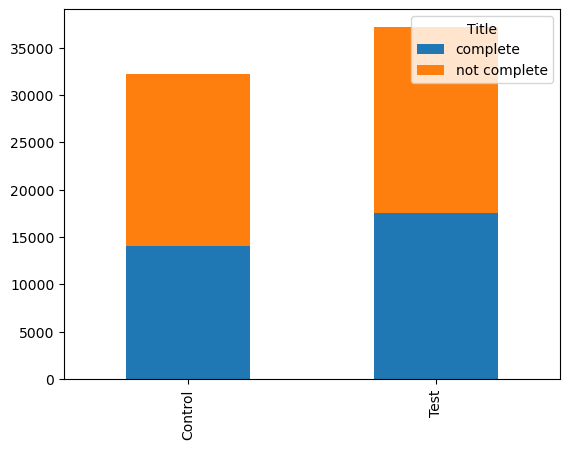

In [76]:
my_df.T.plot(kind = "bar", stacked= True)


AUX:

In [77]:
# "webdata2" filtered to unique "visit_id's" in order to get the respective "client_id"
webdata_unique_client_id= webdata2.drop_duplicates(subset = ["visit_id","client_id"], keep = "first")
# webdata_unique_client_id

In [78]:
webdata_unique_client_id

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
24,1982004,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17 12:02:42
29,9294070,489274391_63794562906,116640698_27328181095_188045,start,2017-04-17 11:16:28
...,...,...,...,...,...
755256,1672289,658797407_91003097342,430110748_90347503221_597628,confirm,2017-05-01 19:31:40
755322,1020453,433909361_21130313633,310496685_94413045985_207142,confirm,2017-05-03 12:41:20
755357,3897324,80177429_24869309091,149796456_64325617570_112561,start,2017-05-04 08:21:30
755375,2443347,818414719_69544570654,148166449_67114410166_524360,confirm,2017-05-30 19:18:18


INFERENTIAL STATS - TIME SPENT (SUCCESSFUL OP.)

In [79]:
# CONTROL GROUP TYPE
count_control[3]
control_visit_timedelta = pd.DataFrame.from_dict(count_control[3],orient ="index", columns=["timedelta"]).reset_index()
control_visit_timedelta.rename(columns={"index":"visit_id"},inplace=True)

In [80]:
# control_visit_timedelta

In [81]:
control_visit_timedelta["visit_id"]=control_visit_timedelta["visit_id"].apply(lambda x: x[0])

In [82]:
# control_visit_timedelta

In [83]:
control_visit_timedelta.rename(columns={"visit_id":"client_id"}, inplace = True)
control_client_id_timedelta_avg = control_visit_timedelta.groupby("client_id").agg({"timedelta":"mean"})

In [84]:
control_client_id_timedelta_avg.reset_index(inplace=True)

In [85]:
# control_client_id_timedelta_avg

In [86]:
control_client_id_timedelta_avg["timedelta"]=control_client_id_timedelta_avg["timedelta"].apply(lambda x: x.total_seconds()/60)

In [119]:
# control_client_id_timedelta_avg

In [88]:
# TEST GROUP TYPE
count_test[3]
test_visit_timedelta = pd.DataFrame.from_dict(count_test[3],orient ="index", columns=["timedelta"]).reset_index()
test_visit_timedelta.rename(columns={"index":"visit_id"},inplace=True)

In [89]:
# test_visit_timedelta

In [90]:
test_visit_timedelta["visit_id"]=test_visit_timedelta["visit_id"].apply(lambda x: x[0])

In [91]:
test_visit_timedelta.rename(columns={"visit_id":"client_id"}, inplace = True)
test_client_id_timedelta_avg = test_visit_timedelta.groupby("client_id").agg({"timedelta":"mean"})

In [92]:
test_client_id_timedelta_avg.reset_index(inplace=True)

In [93]:
test_client_id_timedelta_avg["timedelta"]=test_client_id_timedelta_avg["timedelta"].apply(lambda x: x.total_seconds()/60)

In [94]:
# test_client_id_timedelta_avg

In [95]:
# H0: Average time spent on a successful op. on: TEST >= CONTROL
# H1: Average time spent on a successful op. on: TEST < CONTROL

alpha = 0.05

st.ttest_ind(test_client_id_timedelta_avg["timedelta"], control_client_id_timedelta_avg["timedelta"], alternative="less", equal_var=False)

TtestResult(statistic=-1.4747231662164757, pvalue=0.07014857004381428, df=31001.106696029005)

In [96]:
## We cannot reject the hypothesis that the average time spent on "Test" is equal or greater than the control.

In [97]:
# sns.histplot(test_client_id_timedelta_avg, x="test_timedelta")

[Text(0.5, 0, 'Avg time per operation [min]'),
 Text(0.5, 1.0, 'Control'),
 (0.0, 14.0)]

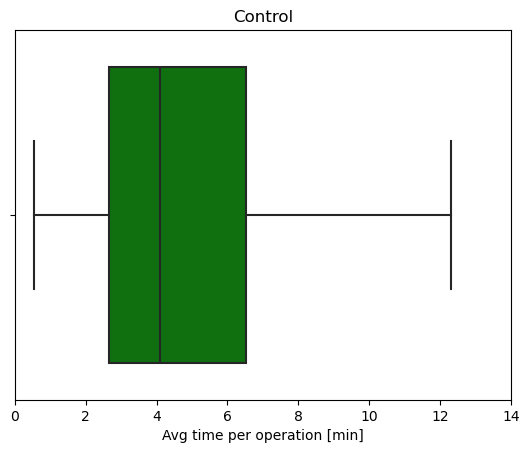

In [98]:
box_plot_control=sns.boxplot(control_client_id_timedelta_avg,x="timedelta",color="green", showfliers=False)
box_plot_control.set(xlabel='Avg time per operation [min]', title="Control", xlim=[0,14])

[Text(0.5, 0, 'Avg time per operation [min]'),
 Text(0.5, 1.0, 'Test'),
 (0.0, 14.0)]

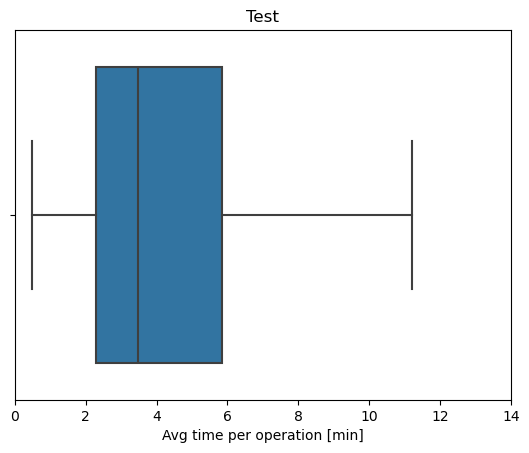

In [99]:
box_plot_test=sns.boxplot(test_client_id_timedelta_avg,x="timedelta", showfliers=False)
box_plot_test.set(xlabel='Avg time per operation [min]', title="Test", xlim=[0,14])

In [100]:
# sns.boxenplot(x=test_client_id_timedelta_avg["timedelta"],y=control_client_id_timedelta_avg["timedelta"], showfliers=False)

In [101]:
# test_client_id_timedelta_avg.to_csv("teste.csv")
# control_client_id_timedelta_avg.to_csv("control.csv")

In [102]:
# unir df control e teste com a designação noutra coluna, para fazer o gráfico por essa variabel categorical

INFERENTIAL STATS - ERROR "RETURN TO START"

In [103]:
# CONTROL GROUP TYPE
my_dict_error_start = {"Title":["Return 'start' error"], "Control": [error_start_control[2]], "Test": [error_start_test[2]]}

In [104]:
count_errors =pd.DataFrame(my_dict_error_start)
count_errors.set_index("Title", inplace = True)
count_errors

,Control,Test
Title,,
Return 'start' error,1617,3126


In [105]:
# TEST GROUP TYPE
my_dict_obs_start = {"Title":["Observations"], "Control": [error_start_control[1]], "Test": [error_start_test[1]]}

In [106]:
count_nobs =pd.DataFrame(my_dict_obs_start)
count_nobs.set_index("Title", inplace = True)
count_nobs

,Control,Test
Title,,
Observations,32237,37190


In [107]:
# # H0: proportion of error "return to 'start'": CONTROL =< TEST
# # H1: proportion of error "return to 'start'": CONTROL > TEST

# proportions_ztest(count,nobs, alternative = "larger")

In [108]:
# H0: Ratio of errors "return to 'start'": CONTROL >= TEST
# H1: Ratio of errors "return to 'start'": CONTROL < TEST

alpha = 0.05

count = count_errors.loc["Return 'start' error"]
nobs = count_nobs.loc["Observations"]

z_stat, p_value = proportions_ztest(count,nobs, alternative = "smaller")

z_stat, p_value

(-17.654950751078427, 4.6607473829956885e-70)

In [109]:
# This means that we rejected the H0, meaning that the "test" has a higher ratio of errors "return to start" than the "control".

In [117]:
# my_df.T.plot(kind = "bar", stacked= True)

INFERENTIAL STATS - ERROR "TIMESTAMP" READINGS

In [111]:
# CONTROL GROUP TYPE
my_dict_error_timestamp = {"Title":["'Timestamp' readings error"], "Control": [error_timestamps_control[2]], "Test": [error_timestamps_test[2]]}

In [112]:
count_errors =pd.DataFrame(my_dict_error_timestamp)
count_errors.set_index("Title", inplace = True)
count_errors

,Control,Test
Title,,
'Timestamp' readings error,590,325


In [113]:
# TEST GROUP TYPE
my_dict_obs_start = {"Title":["Observations"], "Control": [error_timestamps_control[1]], "Test": [error_timestamps_test[1]]}

In [114]:
count_nobs =pd.DataFrame(my_dict_obs_start)
count_nobs.set_index("Title", inplace = True)
count_nobs

,Control,Test
Title,,
Observations,32237,37190


In [115]:
# H0: Ratio of 'Timestamp' readings errors: CONTROL <= TEST
# H1: Ratio of 'Timestamp' readings errors: CONTROL > TEST

alpha = 0.05

count = count_errors.loc["'Timestamp' readings error"]
nobs = count_nobs.loc["Observations"]

z_stat, p_value = proportions_ztest(count,nobs, alternative = "larger")

z_stat, p_value

(11.019371659792169, 1.5410145712094516e-28)

In [116]:
# This means that we rejected the H0, meaning that the "control" has a higher ratio of errors "'Timestamp' readings error" than the "test".